## Life Expectancy and GDP per Country - Codecademy Project

Import libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Read in, preview, and inspect the data as well as print some summary statistics

In [6]:
country_data = pd.read_csv('all_data.csv')
print(country_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [8]:
print(country_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There are no null data points, and the data types of the columns match expectations. 4 columns, 96 rows.

In [5]:
print(country_data.describe(include='all'))

       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min        NaN  2000.000000                         44.300000  4.415703e+09
25%        NaN  2003.750000                         74.475000  1.733018e+11
50%        NaN  2007.500000                         76.750000  1.280220e+12
75%        NaN  2011.250000                         78.900000  4.067510e+12
max        NaN  2015.000000                         81.000000  1.810000e+13


### Proposed project goals:
- Visualize change in GDP and Life Expectancy (LE) over time per country and for the whole data set
- Draw conclusions about year vs GDP and year vs LE for the sample of countries in our data
- Visualize and interpret relationship between GDP and LE per country
- Visualize a clear comparison of countries' GDP over time, LE over time, relationship of GDP vs LE vs time
- Draw conclusions about the 6 countries' growth or stagnation of GDP vs LE over time, the level of proportionality of GDP and LE over time 
- **Answer the following questions:**
        - Is there a correlation between GDP and life expectancy of a country?
        - What is the average life expectancy in these nations?
        - What is the distribution of that life expectancy?

The code below builds a list of country names to use as x axis labels in plots. It also builds a list of unique years from the Years column of the Dataframe and separates out the data by country for more simple referencing in future code.

In [82]:
years = list(set(country_data.Year))
print(years)

countries = list(set(country_data.Country.unique()))
print(countries)

country_data_sub = country_data[['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']].set_index('Country')
chile = country_data_sub.loc['Chile']
china = country_data_sub.loc['China']
germany = country_data_sub.loc['Germany']
mexico = country_data_sub.loc['Mexico']
usa = country_data_sub.loc['United States of America']
zimbabwe = country_data_sub.loc['Zimbabwe']

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
['United States of America', 'Chile', 'Mexico', 'Germany', 'Zimbabwe', 'China']


This code plots the distribution of the data in the GDP column. We can see that the GDP data is right skewed and the plurality of GDP data points from our data frame are on the left (lower GDP). Almost three quarters of the GDP data points are between 0 and half a trillion U.S. dollars, while the rest of the GDP data points are spread out all the way up to 1.81 trillion U.S. dollars.

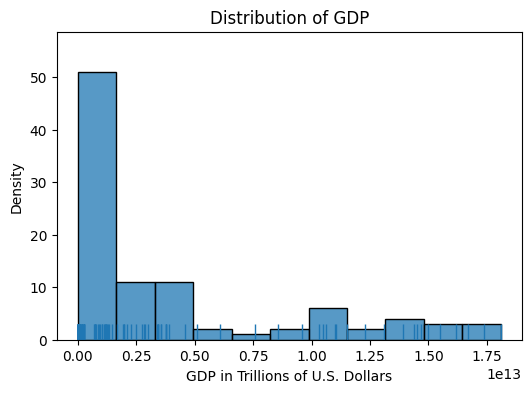

<Figure size 640x480 with 0 Axes>

In [151]:
plt.figure(figsize=(6,4))
sns.histplot(country_data.GDP)
sns.rugplot(country_data.GDP, height=.05)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.ylabel("Density")
plt.title("Distribution of GDP")

plt.show()
plt.clf()

This code plots the distribution of the data in the Life Expectancy (years) column. We can see that it is very left skewed. The majority of the data points land between 71 and 81 years old while there is a left tail of data lands between the minimum of 44.3 years old and around 63 years old. 

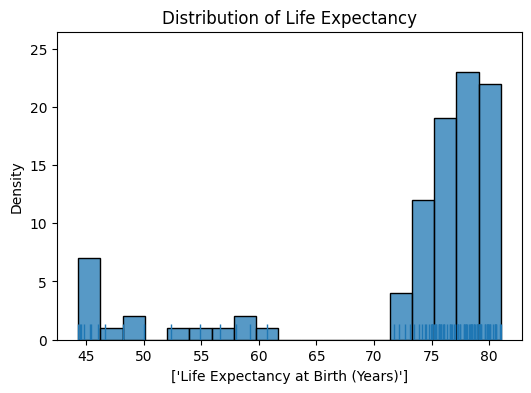

<Figure size 640x480 with 0 Axes>

In [103]:
plt.figure(figsize=(6,4))
sns.histplot(country_data['Life expectancy at birth (years)'])
sns.rugplot(country_data['Life expectancy at birth (years)'], height=.05)
plt.xlabel("['Life Expectancy at Birth (Years)']")
plt.ylabel("Density")
plt.title("Distribution of Life Expectancy")

plt.show()
plt.clf()

The code below prints out statements of average life expectancy and GDP by country. This is a cumbersome format to display the data, so it is not very useful. I have commented it out in favor of table and plot formats.

In [ ]:
# for country in countries:
#     print("Between the years 2000 and 2015, the average yearly life expectancy for " + country + " was " +\
#           str(np.mean(country_data['Life expectancy at birth (years)'][country_data['Country'] == country])) +\
#          " years, and the average yearly GDP was " +\
#          str(np.mean(country_data['GDP'][country_data['Country'] == country])) + (" U.S. Dollars."))

This code produces the same numbers but in a DataFrame. 

In [145]:
country_means = country_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(country_means)

                    Country  Life expectancy at birth (years)           GDP
0                     Chile                          78.94375  1.697888e+11
1                     China                          74.26250  4.957714e+12
2                   Germany                          79.65625  3.094776e+12
3                    Mexico                          75.71875  9.766506e+11
4  United States of America                          78.06250  1.407500e+13
5                  Zimbabwe                          50.09375  9.062580e+09


The plots below are horizontal bar plots of the average Life Expectancy and average GDP data by country. These represent the same data that is shown in the DataFrame above. Germany has the highest average life expectancy while Zimbabwe has the lowest. All nations represented have fairly close average life expectancies from the data except for Zimbabwe which has a significantly lower average life expectancy.

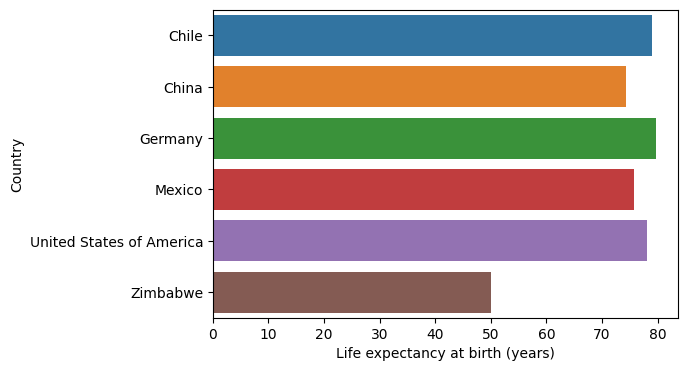

<Figure size 640x480 with 0 Axes>

In [108]:
plt.figure(figsize=(6,4))
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=country_means)
plt.xlabel("Life expectancy at birth (years)")

plt.show()
plt.clf()

The bar plot below shows that the GDP column of data is far less even per country when compared with the previous plot of life expectancy. The U.S. has the highest average GDP by a large margin while Chile and Zimbabwe have very small average GDPs in comparison.

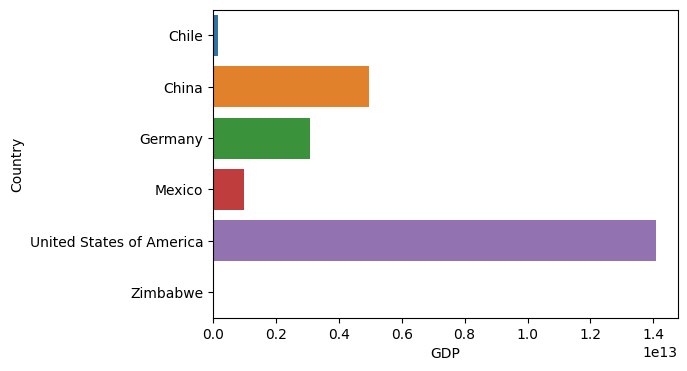

<Figure size 640x480 with 0 Axes>

In [109]:
plt.figure(figsize=(6,4))
sns.barplot(x="GDP", y="Country", data=country_means)
plt.xlabel("GDP")

plt.show()
plt.clf()

The code below creates figures made up of individual axes per country that allow us to compare trends in the data. There are also plots that place data from each country all on the same axis to compare total numbers, maxes, and mins in addition to trends in the data. Fig 1 plots 'Life expectancy at birth (years)' by 'Year'. Fig 2 plots the same, all on the same axis. Fig 3 plots 'GDP' by 'Year'. Fig 4 plots the same, all on the same axis. Fig 5 plots 'Life expectancy at birth (years)' by 'GDP'. Fig 6 plots the same, all on the same axis. Fig 6 displays lines connecting the data points for better visibility. Below each figure is an interpretation of the results.

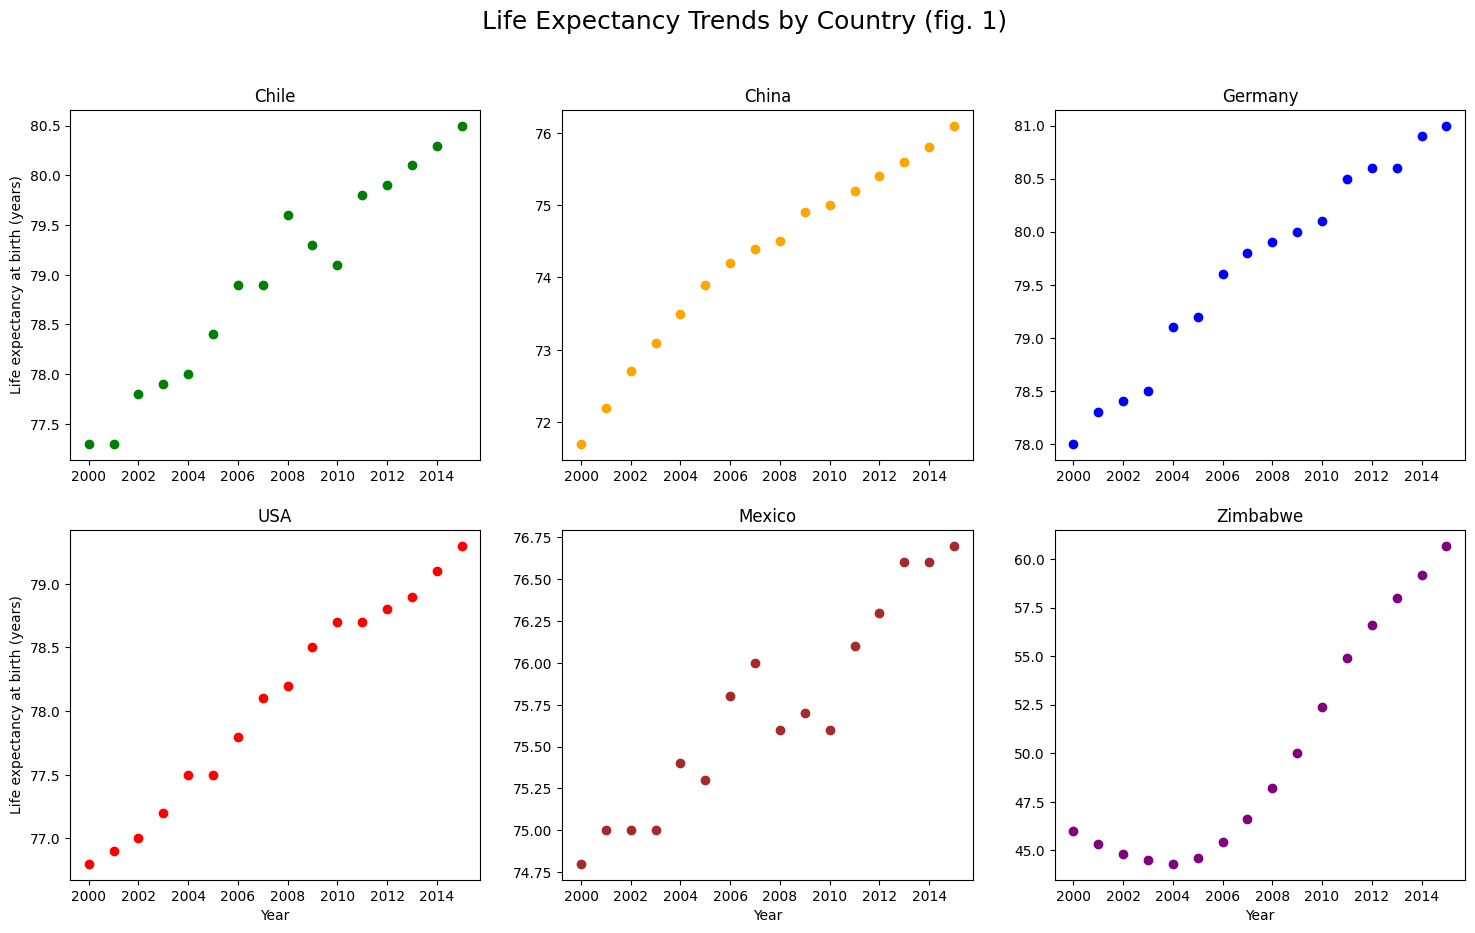

<Figure size 640x480 with 0 Axes>

In [110]:
plt.figure(figsize=(18, 10))

plt.subplot(2,3,1)
plt.plot(chile['Year'], chile['Life expectancy at birth (years)'], color='green', linestyle='', marker='o')
plt.title('Chile')
plt.ylabel('Life expectancy at birth (years)')
plt.suptitle('Life Expectancy Trends by Country (fig. 1)', fontsize=18)

plt.subplot(2,3,2)
plt.plot(china['Year'], china['Life expectancy at birth (years)'], color='orange', linestyle='', marker='o')
plt.title('China')

plt.subplot(2,3,3)
plt.plot(germany['Year'], germany['Life expectancy at birth (years)'], color='blue', linestyle='', marker='o')
plt.title('Germany')

plt.subplot(2,3,4)
plt.plot(usa['Year'], usa['Life expectancy at birth (years)'], color='red', linestyle='', marker='o')
plt.title('USA')
plt.ylabel('Life expectancy at birth (years)')
plt.xlabel('Year')

plt.subplot(2,3,5)
plt.plot(mexico['Year'], mexico['Life expectancy at birth (years)'], color='brown', linestyle='', marker='o')
plt.title('Mexico')
plt.xlabel('Year')

plt.subplot(2,3,6)
plt.plot(zimbabwe['Year'], zimbabwe['Life expectancy at birth (years)'], color='purple', linestyle='', marker='o')
plt.title('Zimbabwe')
plt.xlabel('Year')


plt.show()
plt.clf()

##I attempted to use Seaborn in the code below, but it was not customizable enough.

# fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# fig.suptitle('Life Expectancy Trends by Country')


# sns.lineplot(ax=axes[0,0], data = chile, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='Chile')
# sns.lineplot(ax=axes[0,1], data = china, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='China')
# sns.lineplot(ax=axes[0,2], data = germany, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='Germany')
# sns.lineplot(ax=axes[1,0], data = usa, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='USA')
# sns.lineplot(ax=axes[1,1], data = mexico, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='Mexico')
# sns.lineplot(ax=axes[1,2], data = zimbabwe, x='Year', y='Life expectancy at birth (years)', linestyle='', marker='o').set(title='Zimbabwe')

# plt.show()

##My first attempt was to scatterplot with Seaborn. Only takes one argument so not the best approach

# sns.scatterplot(country_data["Life expectancy at birth (years)"][country_data.Country == "Chile"])
# ax = plt.subplot()
# ax.set_xticks(range(16))
# ax.set_xticklabels(years)

# plt.xticks(rotation=45)
# plt.xlabel('Year')
# plt.show()
# plt.clf()

With independent y axes, we can see the shape of the life expectancy (LE) trends per country over time. We can see that all countries saw overall growth in LE. The U.S., Germany, and China saw very steady increases, while Mexico and Chile saw more variation year-to-year. Zimbabwe saw a dip from 2000 to 2004 and then a steady increase after that.

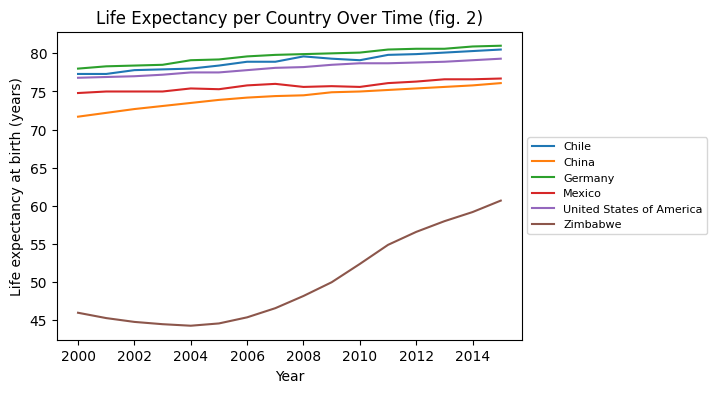

<Figure size 640x480 with 0 Axes>

In [155]:
plt.figure(figsize=(6,4))
sns.lineplot(x=country_data.Year, y=country_data['Life expectancy at birth (years)'], hue=country_data.Country)

plt.xlabel("Year")
plt.ylabel('Life expectancy at birth (years)')
plt.title("Life Expectancy per Country Over Time (fig. 2)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.show()
plt.clf()

#I abondoned the code below because I found solution that requires less lines of code
#and the legend was more difficult to produce using this approach

# plt.figure(figsize=(6,4))

# plt.plot(chile['Year'], chile['Life expectancy at birth (years)'], color='green')
# plt.plot(china['Year'], china['Life expectancy at birth (years)'], color='orange')
# plt.plot(germany['Year'], germany['Life expectancy at birth (years)'], color='blue')
# plt.plot(usa['Year'], usa['Life expectancy at birth (years)'], color='red')
# plt.plot(mexico['Year'], mexico['Life expectancy at birth (years)'], color='brown')
# plt.plot(zimbabwe['Year'], zimbabwe['Life expectancy at birth (years)'], color='purple')

# plt.ylabel('Life expectancy at birth (years)')
# plt.xlabel('Year')
# plt.title("Life Expectancy per Country Over Time (fig. 2)")
# plt.legend(bbox_to_anchor=(1.0, .5), loc='center left', fontsize=8)

# plt.show()
# plt.clf()


With a shared y axis, we can see the same trends as noted above. You can see that Mexico and Chile had less steady growth curves, however it is more difficult to see that trend when compared with the individual y axis plots.

With a shared y axis, we can also see that Zimbabwe is far below the LE of the other countries at every point of the plot. Zimbabwe had the greatest increase in LE increasing from ~45 to ~62 between 2004 and 2015. 

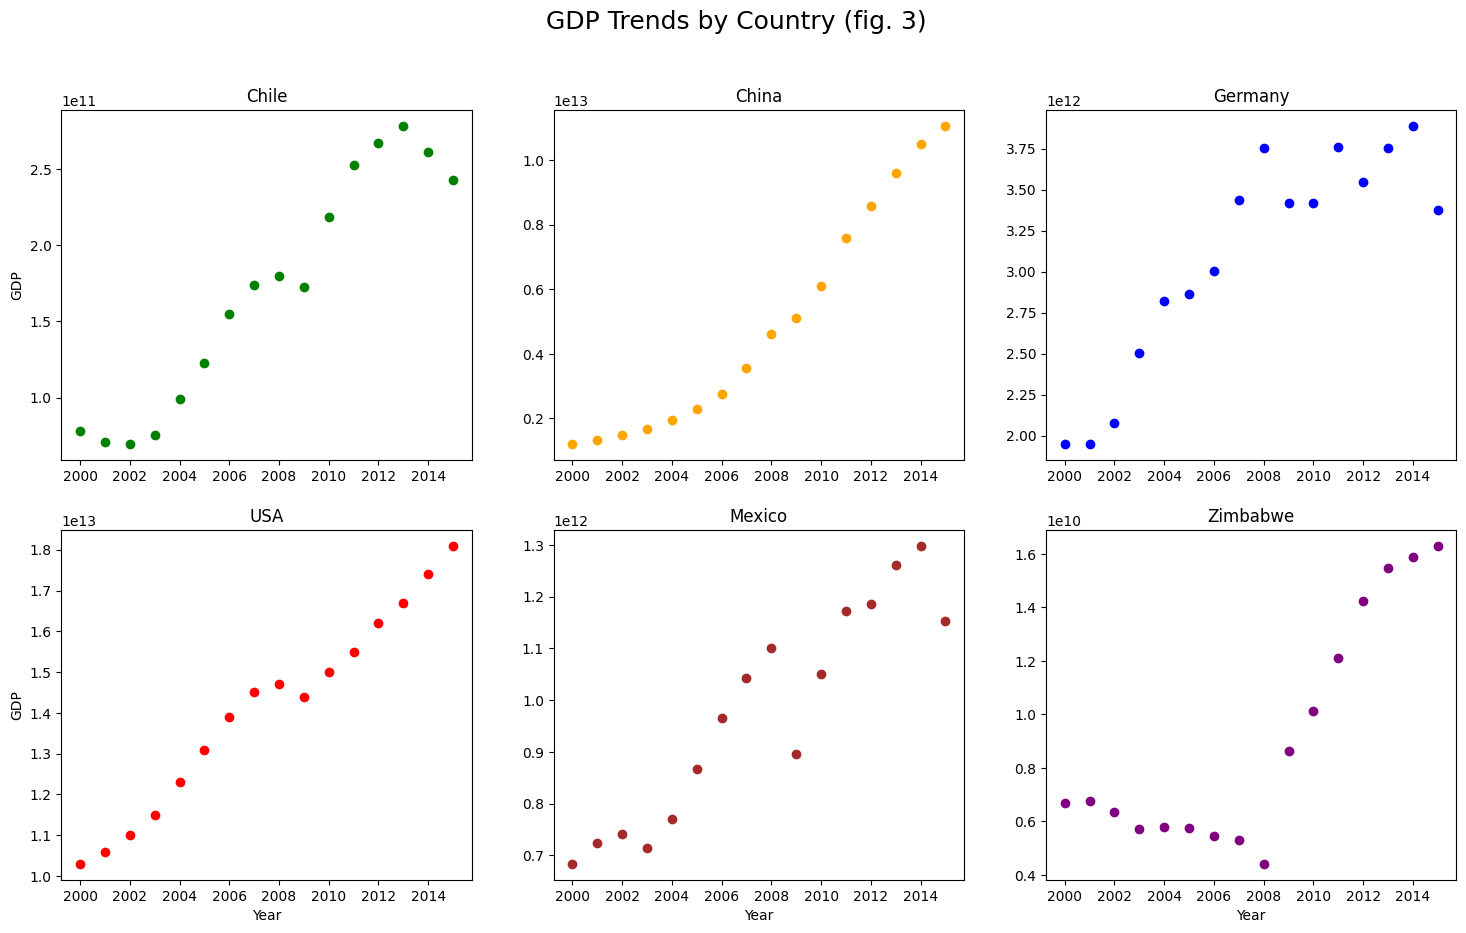

<Figure size 640x480 with 0 Axes>

In [149]:
plt.figure(figsize=(18, 10))

plt.subplot(2,3,1)
plt.plot(chile['Year'], chile['GDP'], color='green', linestyle='', marker='o')
plt.title('Chile')
plt.ylabel('GDP')
plt.suptitle('GDP Trends by Country (fig. 3)', fontsize=18)

plt.subplot(2,3,2)
plt.plot(china['Year'], china['GDP'], color='orange', linestyle='', marker='o')
plt.title('China')

plt.subplot(2,3,3)
plt.plot(germany['Year'], germany['GDP'], color='blue', linestyle='', marker='o')
plt.title('Germany')

plt.subplot(2,3,4)
plt.plot(usa['Year'], usa['GDP'], color='red', linestyle='', marker='o')
plt.title('USA')
plt.ylabel('GDP')
plt.xlabel('Year')

plt.subplot(2,3,5)
plt.plot(mexico['Year'], mexico['GDP'], color='brown', linestyle='', marker='o')
plt.title('Mexico')
plt.xlabel('Year')

plt.subplot(2,3,6)
plt.plot(zimbabwe['Year'], zimbabwe['GDP'], color='purple', linestyle='', marker='o')
plt.title('Zimbabwe')
plt.xlabel('Year')


plt.show()
plt.clf()

Comparing individual plots with individual y axes, we can see that each country had GDP growth from 2000 to 2015. Zimbabwe saw a decrease until 2008 before a larger increase until 2015. Chile saw a dip from 2013 to 2015, but the dip is dwarfed by the growth in previous year periods. Mexico and Germany saw steady growth over the whole time frame, but had more variation between some year-to-year data points than the other countries. The U.S. and China saw the steadiest growth.

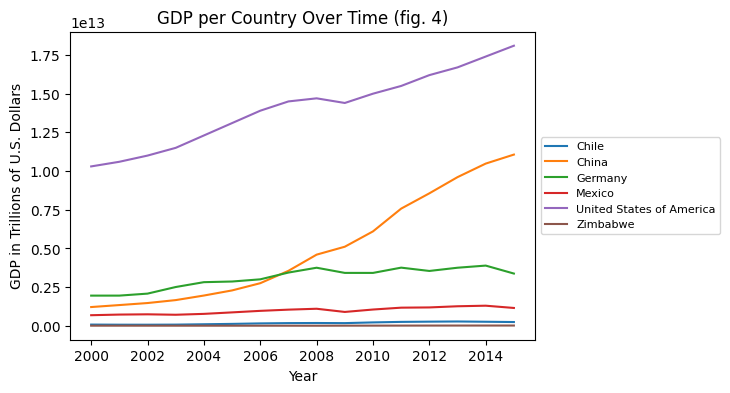

<Figure size 640x480 with 0 Axes>

In [148]:
plt.figure(figsize=(6,4))
sns.lineplot(x=country_data.Year, y=country_data.GDP, hue=country_data.Country)

plt.xlabel("Year")
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP per Country Over Time (fig. 4)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.show()
plt.clf()


In the date range, China and the U.S. saw large growth in GDP whereas the other cuontries stayed much more level in the annual GDP figures in comparison. Since the y axis is shared, we can see that the growth in GDP was far more significant for China and the U.S.

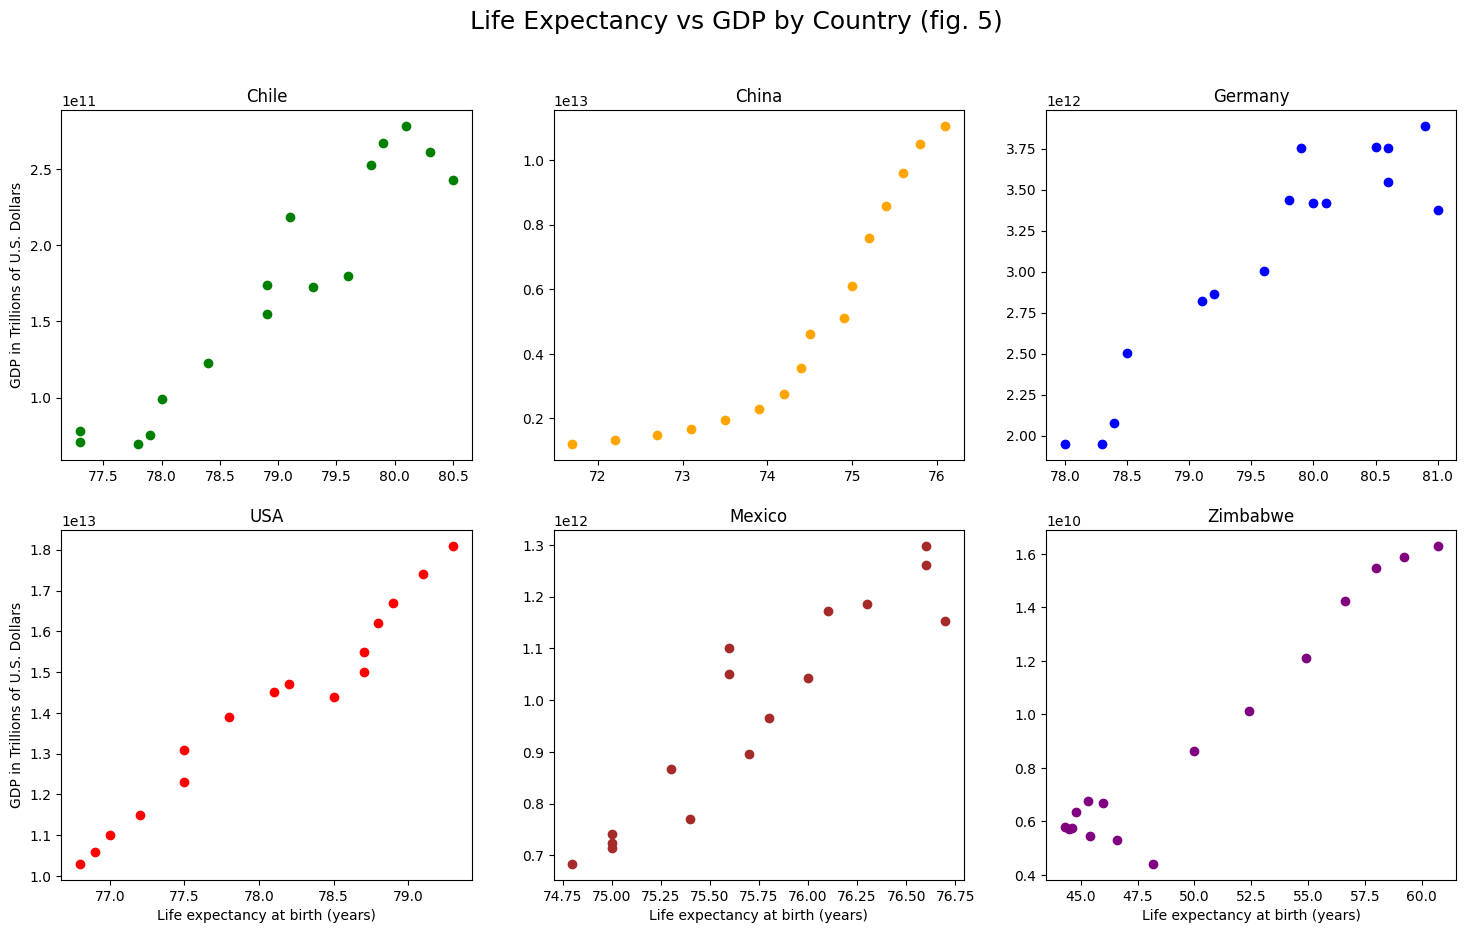

<Figure size 640x480 with 0 Axes>

In [147]:
plt.figure(figsize=(18, 10))

plt.subplot(2,3,1)
plt.plot(chile['Life expectancy at birth (years)'], chile['GDP'], color='green', linestyle='', marker='o')
plt.title('Chile')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.suptitle('Life Expectancy vs GDP by Country (fig. 5)', fontsize=18)

plt.subplot(2,3,2)
plt.plot(china['Life expectancy at birth (years)'], china['GDP'], color='orange', linestyle='', marker='o')
plt.title('China')

plt.subplot(2,3,3)
plt.plot(germany['Life expectancy at birth (years)'], germany['GDP'], color='blue', linestyle='', marker='o')
plt.title('Germany')

plt.subplot(2,3,4)
plt.plot(usa['Life expectancy at birth (years)'], usa['GDP'], color='red', linestyle='', marker='o')
plt.title('USA')
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.xlabel('Life expectancy at birth (years)')

plt.subplot(2,3,5)
plt.plot(mexico['Life expectancy at birth (years)'], mexico['GDP'], color='brown', linestyle='', marker='o')
plt.title('Mexico')
plt.xlabel('Life expectancy at birth (years)')

plt.subplot(2,3,6)
plt.plot(zimbabwe['Life expectancy at birth (years)'], zimbabwe['GDP'], color='purple', linestyle='', marker='o')
plt.title('Zimbabwe')
plt.xlabel('Life expectancy at birth (years)')


plt.show()
plt.clf()

Each country has an linear relationship between GDP and LE which indicates a positive correlation. China has a slightly exponential curve whereas Chile's curve might be slightly logarithmic. 

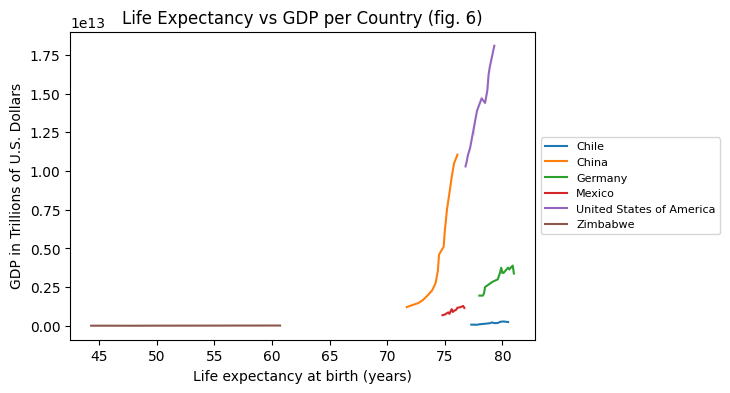

<Figure size 640x480 with 0 Axes>

In [146]:
plt.figure(figsize=(6,4))
sns.lineplot(x=country_data['Life expectancy at birth (years)'], y=country_data.GDP, hue=country_data.Country)

plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title("Life Expectancy vs GDP per Country (fig. 6)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.show()
plt.clf()


We can see that China and the U.S. have very similar slopes of GDP over LE. With a shared y axis, Zimbabwe's curve looks flat as its LE goes up steadily its increase in GDP cannot be seen on the plot becuase it is small in relation to the other nations. Chile's GDP growth can just be made out and Mexico and Germany can be seen to grow at a much smaller scale than China and the U.S.

## Conclusions

LE has increased for all nations, especially Zimbabwe. 

GDP has increased for all 6 nations, with China having the most dramatic increase.

GDP and LE were positively correlated for all countries. China and the US had roughly the same slope when plotting their GDP over LE.

Average life expectancy was between 75 and 80 for all countries except Zimbabwe which was 50. The distribution of LE had a left skew for this reason, with most values landed on the right side of the spread.

